In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from dateutil.parser import parse
import ipyleaflet
from ipyleaflet_legend import Legend

In [3]:
df = pd.read_csv('../data/SensorFloods.csv')

In [4]:
dfAll = pd.read_csv('../data/AllEventsData.csv')

In [5]:
df311 = pd.read_csv('../data/311ServiceRequests.csv', low_memory= False)

### Floodnet Data Plots

Text(0, 0.5, 'Count')

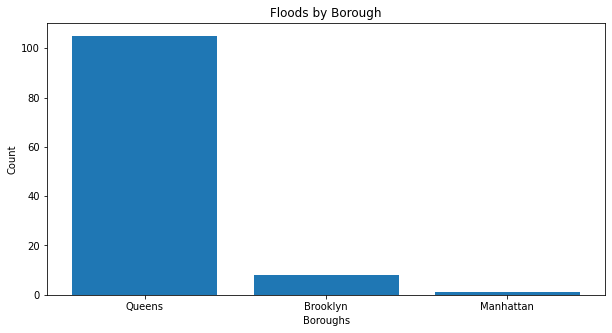

In [6]:
#Plotting number of floods againsts boroughs
floods = df['Borough'].value_counts()

df.Start_time = pd.to_datetime(df.Start_time)
df.End_time = pd.to_datetime(df.End_time)

df['Year'] = df['Start_time'].dt.year
boroughs = np.array([ 'Queens','Brooklyn','Manhattan'])
fig = plt.figure(figsize=(10,5))
fig = plt.title('Floods by Borough')
fig = plt.bar(boroughs,floods)
plt.xlabel('Boroughs')
plt.ylabel("Count")



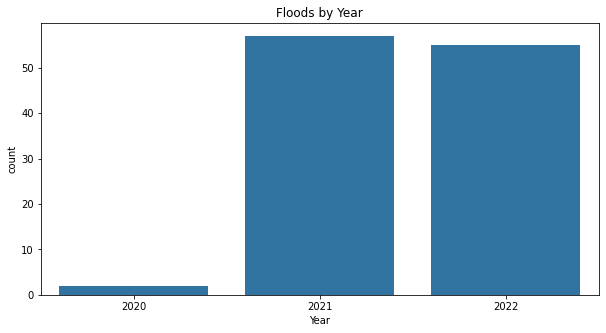

In [7]:
#Floods by year and number of sensors deployed in a year

figure = plt.figure(figsize=(10,5))
figure = plt.title('Floods by Year')
figure = sns.countplot(x = df['Year'], color= '#1f77b4')


Text(0.5, 1.0, 'Floods by Borough and Year')

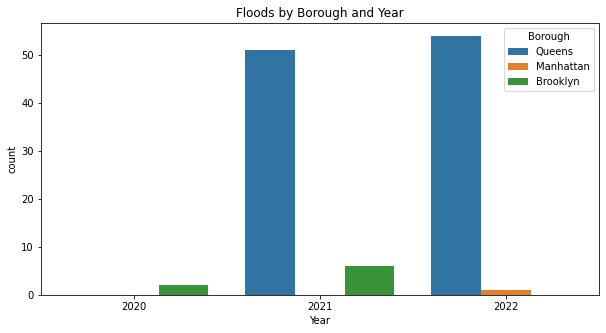

In [8]:
#Floods by Year and Borough
plt.figure(figsize= (10,5))
sns.countplot(x = "Year", data=df,hue='Borough' )
plt.title('Floods by Borough and Year')



Text(0.5, 0, 'AM/PM')

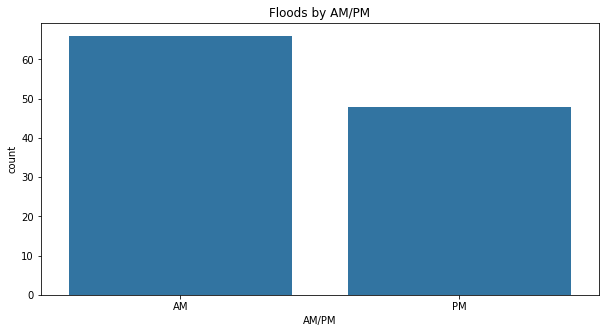

In [9]:
#Plotting AM/PM of flood

df['am-pm'] = df['Start_time'].dt.strftime('%p')
plt.figure(figsize=(10,5))
plt.title('Floods by AM/PM')
sns.countplot(x = df['am-pm'], color='#1f77b4')
plt.xlabel('AM/PM')

Text(0.5, 0, 'Day of the Week')

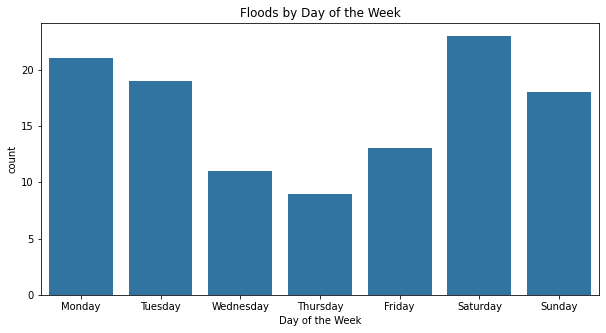

In [10]:
#Plotting Floods by Day of the week
df['day'] = df['Start_time'].dt.day_name()

plt.figure(figsize=(10,5))
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x = df['day'], color='#1f77b4',order=order)
plt.title('Floods by Day of the Week')
plt.xlabel('Day of the Week')


Text(0.5, 0, 'Hour (24-hour format)')

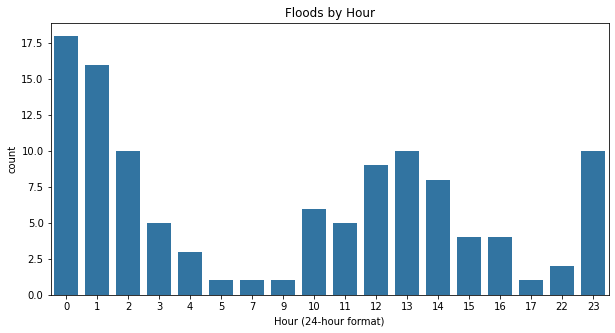

In [11]:
#Plottng floods by hour 
df['hour'] = df['Start_time'].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(x=df['hour'], color='#1f77b4')
plt.title('Floods by Hour')
plt.xlabel('Hour (24-hour format)')

Text(0.5, 0, 'Sensor Type')

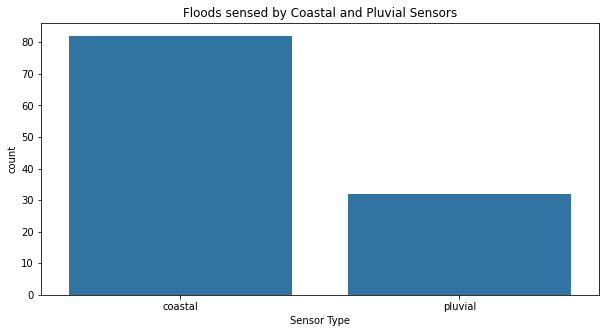

In [12]:
#Plotting floods by tidal and pluvial
plt.figure(figsize=(10,5))
sns.countplot(x = df['Type '], color='#1f77b4')
plt.title('Floods sensed by Coastal and Pluvial Sensors')
plt.xlabel('Sensor Type')

([<matplotlib.axis.XTick at 0x1f1f04235b0>,
 [Text(0, 0, '2021-04-28'),
  Text(1, 0, '2021-04-29'),
  Text(2, 0, '2021-04-30'),
  Text(3, 0, '2021-05-29'),
  Text(4, 0, '2021-05-30'),
  Text(5, 0, '2021-06-21')])

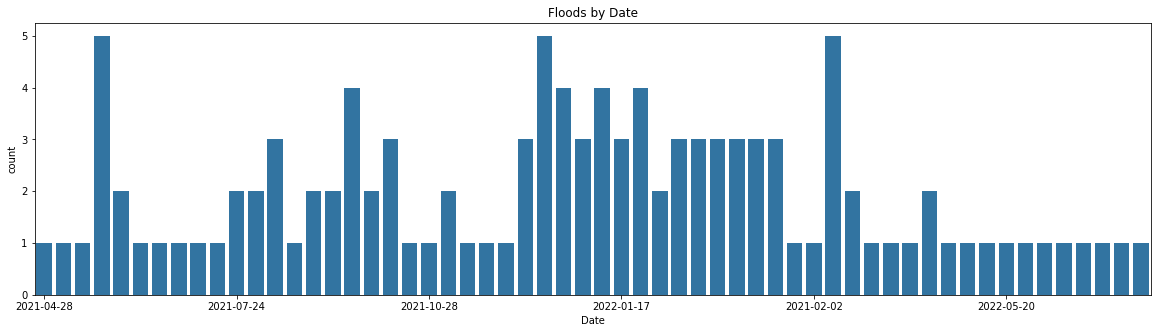

In [13]:
df['date'] = df['Start_time'].dt.date
plt.figure(figsize=(20,5))
sns.countplot(x=df['date'], color='#1f77b4')
plt.title('Floods by Date')
plt.xlabel('Date')

plt.xticks([0, 10, 20, 30, 40, 50])

Text(0.5, 0, 'Month')

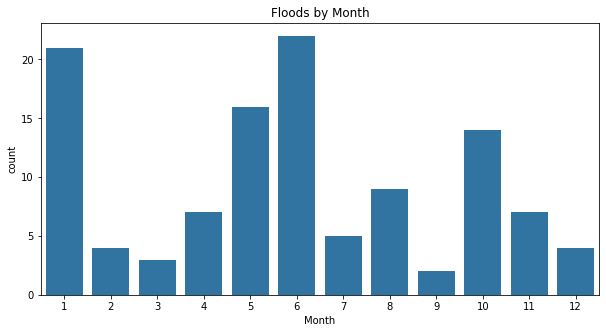

In [14]:
df['month'] = df['Start_time'].dt.month
plt.figure(figsize=(10,5))
sns.countplot(x=df['month'], color='#1f77b4')
plt.title('Floods by Month')
plt.xlabel('Month')

Text(0.5, 1.0, 'Coastal and Pluvial Floods by Year')

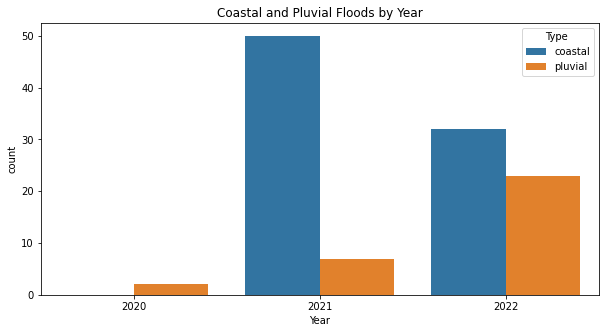

In [15]:
#Plotting tidal and pluvial floods by year
plt.figure(figsize= (10,5))
sns.countplot(x = "Year", data=df, hue='Type ' )
plt.title('Coastal and Pluvial Floods by Year')

In [16]:
"""#Plotting top 5 longest floods and their dates (INCOMPLETE)


df['Duration'] = df['End_time']  - df['Start_time']
df = df.sort_values(by=['Duration'],ascending=False).head()
df['Date'] = df['Start_time'].dt.date

#plt.figure(figsize=(10,5))
#sns.barplot(data=df,order="Duration")"""


'#Plotting top 5 longest floods and their dates (INCOMPLETE)\n\n\ndf[\'Duration\'] = df[\'End_time\']  - df[\'Start_time\']\ndf = df.sort_values(by=[\'Duration\'],ascending=False).head()\ndf[\'Date\'] = df[\'Start_time\'].dt.date\n\n#plt.figure(figsize=(10,5))\n#sns.barplot(data=df,order="Duration")'

C:\Users\sadhv\AppData\Local\Temp\ipykernel_19964\136583821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Deployment Date'] = pd.to_datetime(new['Deployment Date'])
C:\Users\sadhv\AppData\Local\Temp\ipykernel_19964\136583821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['DepYear'] = new['Deployment Date'].dt.year


Text(0.5, 1.0, 'Sensors Deployed')

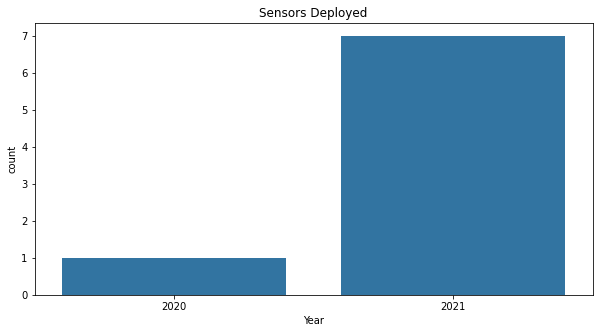

In [17]:
new = df.drop_duplicates('Deployment_id')
new['Deployment Date'] = pd.to_datetime(new['Deployment Date'])
new['DepYear'] = new['Deployment Date'].dt.year
new
plt.figure(figsize=(10,5))
sns.countplot(x=new['DepYear'], color= '#1f77b4')
plt.xlabel('Year')
plt.title('Sensors Deployed')

### Comparing 311 data with Floodnet Data

In [18]:
#IDEAS FOR COMPARISON CHARTS
# 1. Look at data for a particular region for a whole year and plot a time series of the number of floods caught in the sensor in a year with the number of 311 flood complaints 
# 2. plot a map of 311 flood complaints in the neighborhood the sensor is in and the location of the sensor
# 3. A map of sensor locations and where most floods are reported


In [19]:
#convert created date column to datetime values
df311['Created Date'] = pd.to_datetime(df311['Created Date'])

In [20]:
#filter out years before 2020
df311= df311[df311['Created Date'].dt.year > 2019]

Text(0.5, 0, 'Year')

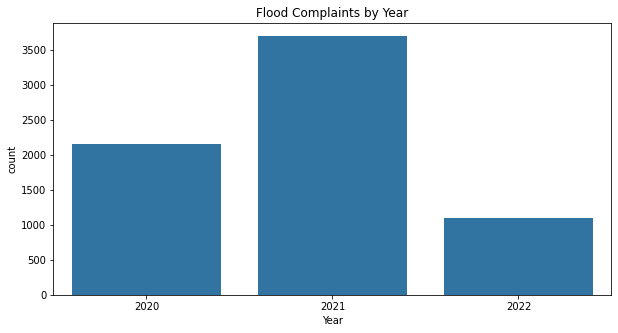

In [21]:
df311['year'] = df311['Created Date'].dt.year
plt.figure(figsize=(10,5))
sns.countplot(x=df311['year'], color='#1f77b4')
plt.title('Flood Complaints by Year')
plt.xlabel('Year')

{2021: 57, 2022: 55, 2020: 2}


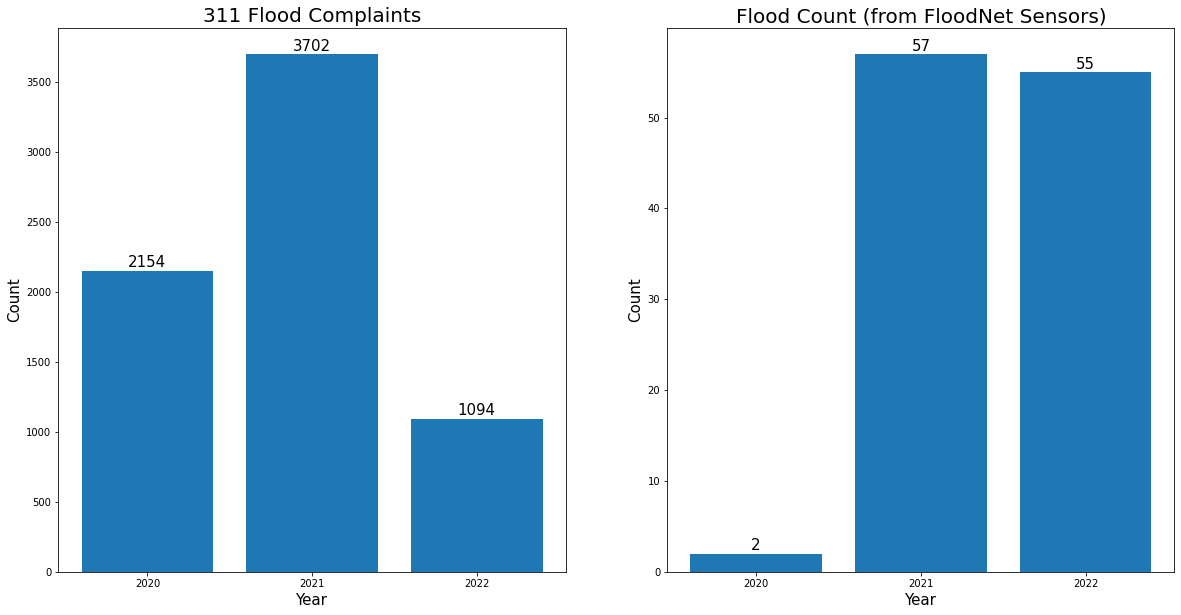

In [22]:
counts_by_year311 = {}
for index, row in df311.iterrows():
    if row['Created Date'].year not in counts_by_year311:
        counts_by_year311[row['Created Date'].year] = 1
    else:
        counts_by_year311[row['Created Date'].year] += 1

x = list(counts_by_year311.keys())
y = list(counts_by_year311.values())

counts_by_yearfn = {}
for index, row in df.iterrows():
    if row['Start_time'].year not in counts_by_yearfn:
        counts_by_yearfn[row['Start_time'].year] = 1
    else:
        counts_by_yearfn[row['Start_time'].year] += 1

print(counts_by_yearfn)

x1 = list(counts_by_yearfn.keys())
y1 = list(counts_by_yearfn.values())

figure, array = plt.subplots(ncols=2, figsize=(20, 10))

array[0].bar(x,y)
array[0].set_title('311 Flood Complaints', fontsize=20)

array[1].bar(x1,y1)
array[1].set_title("Flood Count (from FloodNet Sensors)", fontsize=20)

for plot in array:
    plot.set_xlabel('Year', fontsize=15)
    plot.set_ylabel('Count', fontsize=15)
    for bar in plot.patches:
        plot.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plot.set_xticks([2020, 2021, 2022])
    
    

{4: 7, 5: 16, 6: 22, 7: 5, 8: 9, 9: 2, 10: 14, 11: 7, 12: 4, 1: 21, 3: 3, 2: 4}


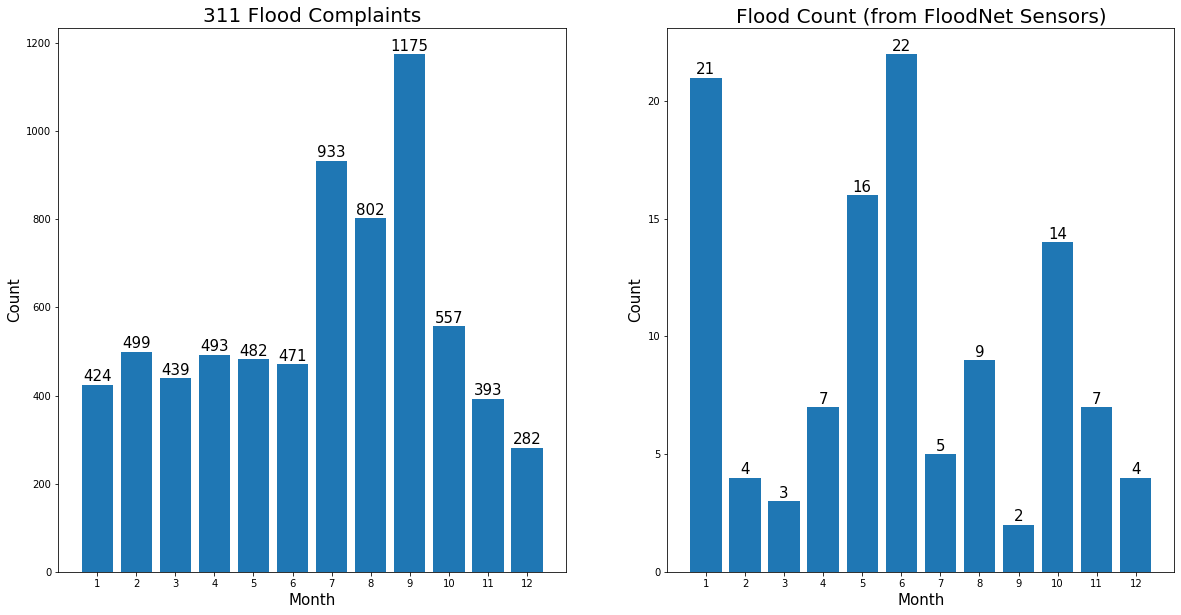

In [23]:
counts_by_month311 = {}
for index, row in df311.iterrows():
    if row['Created Date'].month not in counts_by_month311:
        counts_by_month311[row['Created Date'].month] = 1
    else:
        counts_by_month311[row['Created Date'].month] += 1

x = list(counts_by_month311.keys())
y = list(counts_by_month311.values())

counts_by_monthfn = {}
for index, row in df.iterrows():
    if row['Start_time'].month not in counts_by_monthfn:
        counts_by_monthfn[row['Start_time'].month] = 1
    else:
        counts_by_monthfn[row['Start_time'].month] += 1

print(counts_by_monthfn)

x1 = list(counts_by_monthfn.keys())
y1 = list(counts_by_monthfn.values())

figure, array = plt.subplots(ncols=2, figsize=(20, 10))

array[0].bar(x,y)
array[0].set_title('311 Flood Complaints', fontsize=20)

array[1].bar(x1,y1)
array[1].set_title("Flood Count (from FloodNet Sensors)", fontsize=20)

for plot in array:
    plot.set_xlabel('Month', fontsize=15)
    plot.set_ylabel('Count', fontsize=15)
    for bar in plot.patches:
        plot.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plot.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])

In [24]:
dfDeployment = pd.read_csv('../data/DeploymentOrder.csv')

{'2020-10-05': 1, '2021-03-05': 3, '2021-07-15': 2, '2021-12-10': 1, '2021-12-12': 1, '2021-12-14': 1, '2022-02-11': 3, '2022-02-18': 3, '2022-06-10': 3}


Text(0.5, 1.0, 'Sensors Deployed over Time')

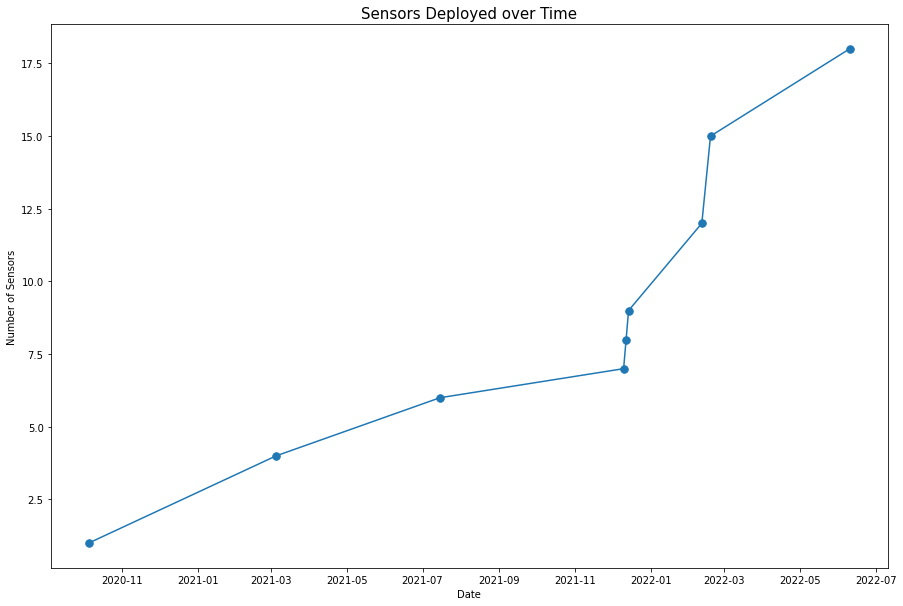

In [25]:
sensor_deployments = {}

for index, row in dfDeployment.iterrows():
    if row['Deployment Date'] not in sensor_deployments:
        sensor_deployments[row['Deployment Date']] = 1
    else:
        sensor_deployments[row['Deployment Date']] += 1

print(sensor_deployments)

counts = []
index = 0
for key in sensor_deployments:
    if len(counts) == 0:
        counts.append(sensor_deployments[key])
    else:
        counts.append(counts[len(counts)-1]+sensor_deployments[key])

x = list(sensor_deployments.keys())
x = [pd.to_datetime(date) for date in x]
y = counts

plt.figure(figsize=(15,10))
plt.plot(x,y, marker='.', markersize=15)
plt.xlabel('Date')
plt.ylabel('Number of Sensors')
plt.title('Sensors Deployed over Time', fontsize=15)
